# Estatística Descritiva do Preço da Gasolina no mês de Fevereiro e Março/22

---


#### Pequena análise feita por Deusdedit Teixeira, com o intuito de manipular, transformar, vizualizar os dados e tirar conclusões.


#### Conclusão:
*   Após as manipulações e transformações aplicadas ao Dataframe intitulado de dados, possível dizer que o preço praticado da gasolina no período de 21/02/2022 até 18/03/2022 teve bastante variações ao consumidor, tendo um valor médio cobrado de 106.18 R$/kg.
*   Fonte dos dados:[Série histórica de preços de combustiveis por revenda](https://dados.gov.br/dataset/serie-historica-de-precos-de-combustiveis-por-revenda)






In [9]:
#Importando os pacotes para manipulação de dados
import pandas as pd
import math
import seaborn as sns
from matplotlib import rcParams

In [63]:
#Carregando e armazenando os dados em uma variável
dados = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/qus/ultimas-4-semanas-glp-2.csv',sep = ';')
dados

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,MG,MURIAE,SUPERGASBRAS ENERGIA LTDA.,19.791.896/0079-62,ESTRADA RIO - BAHIA,S/N,KM 708,BARRA,36880-000,GLP,21/02/2022,105,NaN,R$ / 13 kg,SUPERGASBRAS ENERGIA
1,NE,CE,JUAZEIRO DO NORTE,COMÉRCIO DE PETROLEO COLORADO LTDA,00.198.451/0001-85,RUA DOMINGOS CALAZANS,518,NaN,TRIANGULO,63041-130,GLP,21/02/2022,100,NaN,R$ / 13 kg,NACIONAL GÁS BUTANO
2,SE,SP,SAO VICENTE,CONSIGAZ DISTRIBUIDORA DE GÁS LTDA.,01.597.589/0003-81,RUA MANOEL DE ABREU,790,QUADRA 108,CIDADE NAUTICA,11355-400,GLP,23/02/2022,"97,99",NaN,R$ / 13 kg,CONSIGAZ
3,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GLP,23/02/2022,120,NaN,R$ / 13 kg,AMAZONGÁS
4,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,GLP,23/02/2022,120,NaN,R$ / 13 kg,AMAZONGÁS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15210,SE,RJ,SAQUAREMA,SONIA S RODRIGUES,32.353.695/0001-81,RUA NOVENTA E SEIS,S/N,LOTE 20 QUADRA2243,JACONE (SAMPAIO CORREIA),28999-034,GLP,16/03/2022,98,NaN,R$ / 13 kg,SUPERGASBRAS ENERGIA
15211,SE,MG,JANAUBA,GAS SILVA MURCA LTDA,06.223.900/0002-65,AVENIDA BRASIL,590,NaN,CENTRO,39442-010,GLP,16/03/2022,"92,22",NaN,R$ / 13 kg,SUPERGASBRAS ENERGIA
15212,S,PR,UMUARAMA,ALEXSANDRO JOSE MAIRINQUE - LIMITADA,37.498.253/0001-47,AVENIDA RIO GRANDE DO NORTE,6015,NaN,ZONA 4,87503-000,GLP,14/03/2022,125,NaN,R$ / 13 kg,ULTRAGAZ
15213,N,PA,ITAITUBA,M T SCHILLREFF COMERCIO DE AGUA E GAS,35.157.035/0001-13,RUA A6,0,QUADRA353 LOTE 0221 ...,JARDIM AMERICA,68182-180,GLP,14/03/2022,135,NaN,R$ / 13 kg,NACIONAL GÁS BUTANO


In [64]:
#Verificando os tipos de dados
dados.dtypes

Regiao - Sigla        object
Estado - Sigla        object
Municipio             object
Revenda               object
CNPJ da Revenda       object
Nome da Rua           object
Numero Rua            object
Complemento           object
Bairro                object
Cep                   object
Produto               object
Data da Coleta        object
Valor de Venda        object
Valor de Compra      float64
Unidade de Medida     object
Bandeira              object
dtype: object

In [65]:
#Tranformando a feature Valor de Venda para o tipo float
dados['Valor de Venda'] = dados['Valor de Venda'].str.replace(',','.')
dados['Valor de Venda'] = dados['Valor de Venda'].astype(float)
dados['Valor de Venda']

0        105.00
1        100.00
2         97.99
3        120.00
4        120.00
          ...  
15210     98.00
15211     92.22
15212    125.00
15213    135.00
15214    115.00
Name: Valor de Venda, Length: 15215, dtype: float64

In [68]:
#Tranformando para o tipo data 
dados['Data da Coleta'] =  pd.to_datetime(dados['Data da Coleta'], dayfirst = True)

In [71]:
dados['Data da Coleta'].min()

Timestamp('2022-02-21 00:00:00+0000', tz='UTC')

In [72]:
dados['Data da Coleta'].max()

Timestamp('2022-03-18 00:00:00+0000', tz='UTC')

In [69]:
#Verificando se as modificações estão no df dados 
dados

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,MG,MURIAE,SUPERGASBRAS ENERGIA LTDA.,19.791.896/0079-62,ESTRADA RIO - BAHIA,S/N,KM 708,BARRA,36880-000,GLP,2022-02-21 00:00:00+00:00,105.00,NaN,R$ / 13 kg,SUPERGASBRAS ENERGIA
1,NE,CE,JUAZEIRO DO NORTE,COMÉRCIO DE PETROLEO COLORADO LTDA,00.198.451/0001-85,RUA DOMINGOS CALAZANS,518,NaN,TRIANGULO,63041-130,GLP,2022-02-21 00:00:00+00:00,100.00,NaN,R$ / 13 kg,NACIONAL GÁS BUTANO
2,SE,SP,SAO VICENTE,CONSIGAZ DISTRIBUIDORA DE GÁS LTDA.,01.597.589/0003-81,RUA MANOEL DE ABREU,790,QUADRA 108,CIDADE NAUTICA,11355-400,GLP,2022-02-23 00:00:00+00:00,97.99,NaN,R$ / 13 kg,CONSIGAZ
3,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GLP,2022-02-23 00:00:00+00:00,120.00,NaN,R$ / 13 kg,AMAZONGÁS
4,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,GLP,2022-02-23 00:00:00+00:00,120.00,NaN,R$ / 13 kg,AMAZONGÁS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15210,SE,RJ,SAQUAREMA,SONIA S RODRIGUES,32.353.695/0001-81,RUA NOVENTA E SEIS,S/N,LOTE 20 QUADRA2243,JACONE (SAMPAIO CORREIA),28999-034,GLP,2022-03-16 00:00:00+00:00,98.00,NaN,R$ / 13 kg,SUPERGASBRAS ENERGIA
15211,SE,MG,JANAUBA,GAS SILVA MURCA LTDA,06.223.900/0002-65,AVENIDA BRASIL,590,NaN,CENTRO,39442-010,GLP,2022-03-16 00:00:00+00:00,92.22,NaN,R$ / 13 kg,SUPERGASBRAS ENERGIA
15212,S,PR,UMUARAMA,ALEXSANDRO JOSE MAIRINQUE - LIMITADA,37.498.253/0001-47,AVENIDA RIO GRANDE DO NORTE,6015,NaN,ZONA 4,87503-000,GLP,2022-03-14 00:00:00+00:00,125.00,NaN,R$ / 13 kg,ULTRAGAZ
15213,N,PA,ITAITUBA,M T SCHILLREFF COMERCIO DE AGUA E GAS,35.157.035/0001-13,RUA A6,0,QUADRA353 LOTE 0221 ...,JARDIM AMERICA,68182-180,GLP,2022-03-14 00:00:00+00:00,135.00,NaN,R$ / 13 kg,NACIONAL GÁS BUTANO


In [73]:
#Verificando novamente os tipos
dados.dtypes

Regiao - Sigla                    object
Estado - Sigla                    object
Municipio                         object
Revenda                           object
CNPJ da Revenda                   object
Nome da Rua                       object
Numero Rua                        object
Complemento                       object
Bairro                            object
Cep                               object
Produto                           object
Data da Coleta       datetime64[ns, UTC]
Valor de Venda                   float64
Valor de Compra                  float64
Unidade de Medida                 object
Bandeira                          object
dtype: object

In [76]:
#preco = dados['Valor de Venda'].str.replace(',','.')
#preco= preco.astype(float)
#preco = pd.DataFrame(preco)
#preco



In [75]:
#Fazendo um resumo breve da feature Valor de Venda
x = dados['Valor de Venda'].describe()
x

count    15215.000000
mean       106.183247
std         10.327698
min         78.000000
25%         99.990000
50%        105.000000
75%        112.000000
max        160.000000
Name: Valor de Venda, dtype: float64

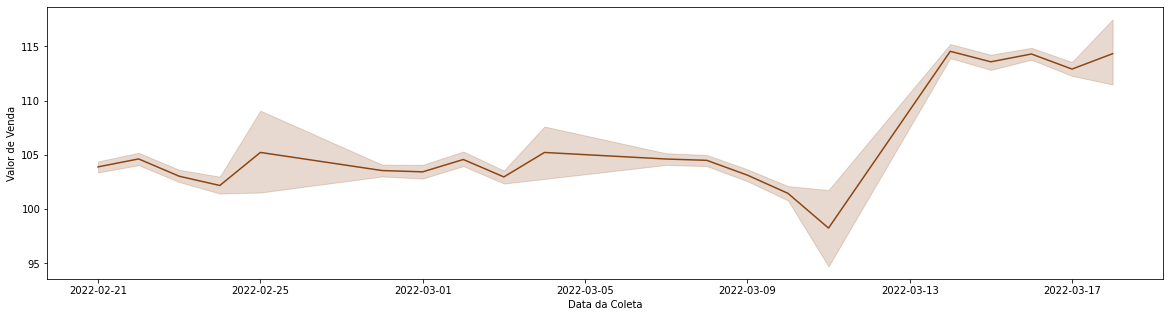

In [80]:
#Gráfico de Linha
rcParams['figure.figsize'] = 20,5
sns.lineplot(x ='Data da Coleta', y = 'Valor de Venda', data = dados,color = '#8B4513')

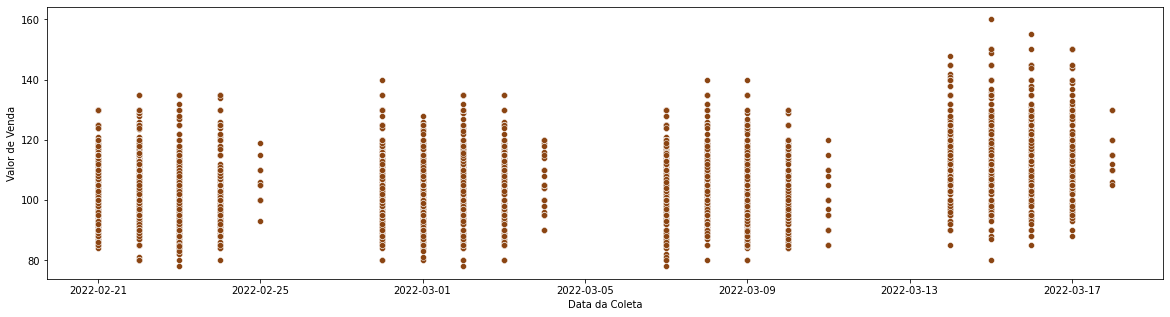

In [79]:
#Scatterplot
#Verificando a existência entre as variáveis Tempo VS Preço ao consumidor
sns.scatterplot(x ='Data da Coleta', y = 'Valor de Venda', data = dados,color = '#8B4513')

Text(0.5, 1.0, 'Histograma dos Preços de Venda de Gasolina')

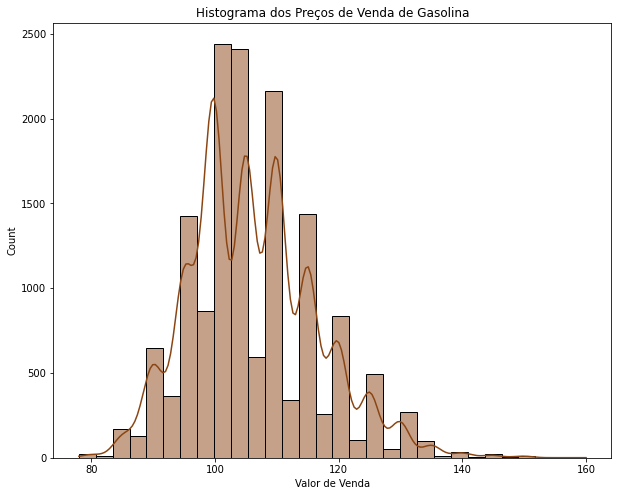

In [21]:
#Histograma
rcParams['figure.figsize'] = 10,8
hist = sns.histplot(data = preco,x = 'Valor de Venda',color = '#8B4513',bins = 30, kde = True)
hist.set_title("Histograma dos Preços de Venda de Gasolina")

Text(0.5, 1.0, 'Boxplot do Valor de Venda da Gasolina')

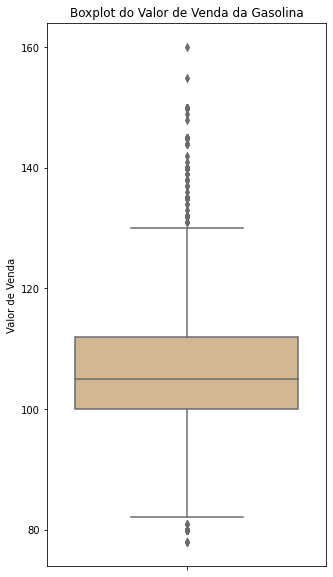

In [22]:
#Boxplot
rcParams['figure.figsize'] = 5,10
box = sns.boxplot(y = 'Valor de Venda',data = preco,color = '#DEB887')
box.set_title("Boxplot do Valor de Venda da Gasolina")
